In [ ]:
# This is predecessor code for generating fake data for testing a photometry pipeline

# Created 2021 Aug 6 by E.S.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pytransit import QuadraticModel

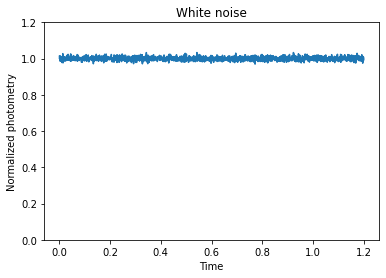

In [2]:
# simple Gaussian white noise

length_dataset = 2000

# time; don't know what form this will take
abcissa_time = np.linspace(0,1.2,length_dataset)
# Gaussian noise
photometry_white_zero = np.random.normal(loc=0.0, scale=0.01, size=length_dataset)
photometry_norm_white = np.add(1.,photometry_white_zero)

plt.plot(abcissa_time,photometry_norm_white)
plt.ylim([0,1.2])
plt.title("White noise")
plt.xlabel("Time")
plt.ylabel("Normalized photometry")
plt.show()

#pd.to_csv("junk_simple_gaussian.csv")

In [ ]:
# generate transit model

tm = QuadraticModel()
#tm.set_data(times)
tm.set_data(abcissa_time)

# note t0 is time-of-center
model_transit = tm.evaluate(k=0.5, ldc=[0.2, 0.1], t0=0.6, p=2.7, a=3.0, i=0.5*np.pi)

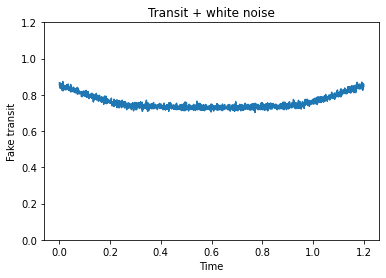

In [4]:
noisy_transit = np.add(photometry_white_zero,model_transit)

plt.clf()
plt.plot(tm.time, noisy_transit)
plt.ylim([0,1.2])
plt.title("Transit + white noise")
plt.xlabel("Time")
plt.ylabel("Fake transit")
plt.show()

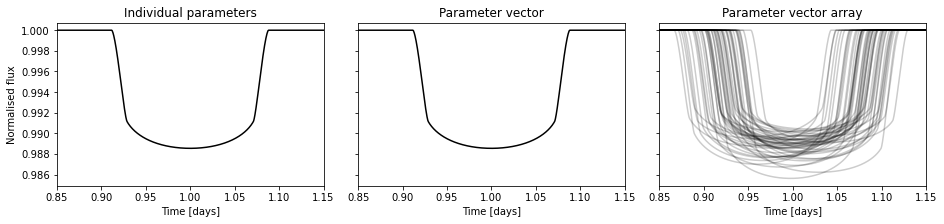

In [16]:
'''
Code from https://github.com/hpparvi/PyTransit/blob/master/notebooks/example_quadratic_model.ipynb

seed(0)

times_sc = np.linspace(0.85, 1.15, 1000)  # Short cadence time stamps
times_lc = np.linspace(0.85, 1.15,  100)  # Long cadence time stamps

k, t0, p, a, i, e, w  = 0.1, 1., 2.1, 3.2, 0.5*np.pi, 0.3, 0.4*np.pi
pvp = np.tile([k, t0, p, a, i, e, w], (50,1))
pvp[1:,0] += np.random.normal(0.0, 0.005, size=pvp.shape[0]-1)
pvp[1:,1] += np.random.normal(0.0, 0.02, size=pvp.shape[0]-1)

ldc = np.stack([np.random.normal(0.3, 0.05, pvp.shape[0]), np.random.normal(0.1, 0.02, pvp.shape[0])], 1)

tm = QuadraticModel()

tm.set_data(times_sc)

def plot_transits(tm, ldc, fmt='k'):
    fig, axs = plt.subplots(1, 3, figsize = (13,3), constrained_layout=True, sharey=True)

    flux = tm.evaluate_ps(k, ldc[0], t0, p, a, i, e, w)
    axs[0].plot(tm.time, flux, fmt)
    axs[0].set_title('Individual parameters')

    flux = tm.evaluate_pv(pvp[0], ldc[0])
    axs[1].plot(tm.time, flux, fmt)
    axs[1].set_title('Parameter vector')

    flux = tm.evaluate_pv(pvp, ldc)
    axs[2].plot(tm.time, flux.T, 'k', alpha=0.2);
    axs[2].set_title('Parameter vector array')

    plt.setp(axs[0], ylabel='Normalised flux')
    plt.setp(axs, xlabel='Time [days]', xlim=tm.time[[0,-1]])
    
tm.set_data(times_sc)
plot_transits(tm, ldc)
'''

In [17]:
times_sc

array([0.85      , 0.8503003 , 0.8506006 , 0.8509009 , 0.8512012 ,
       0.8515015 , 0.8518018 , 0.8521021 , 0.8524024 , 0.8527027 ,
       0.853003  , 0.8533033 , 0.8536036 , 0.8539039 , 0.8542042 ,
       0.8545045 , 0.8548048 , 0.85510511, 0.85540541, 0.85570571,
       0.85600601, 0.85630631, 0.85660661, 0.85690691, 0.85720721,
       0.85750751, 0.85780781, 0.85810811, 0.85840841, 0.85870871,
       0.85900901, 0.85930931, 0.85960961, 0.85990991, 0.86021021,
       0.86051051, 0.86081081, 0.86111111, 0.86141141, 0.86171171,
       0.86201201, 0.86231231, 0.86261261, 0.86291291, 0.86321321,
       0.86351351, 0.86381381, 0.86411411, 0.86441441, 0.86471471,
       0.86501502, 0.86531532, 0.86561562, 0.86591592, 0.86621622,
       0.86651652, 0.86681682, 0.86711712, 0.86741742, 0.86771772,
       0.86801802, 0.86831832, 0.86861862, 0.86891892, 0.86921922,
       0.86951952, 0.86981982, 0.87012012, 0.87042042, 0.87072072,
       0.87102102, 0.87132132, 0.87162162, 0.87192192, 0.87222